# Working with Custom Images

----------
ORIGINAL DATA SOURCE:

The dataset contains 3 folders : train, test, validation
Each set contains 2 folders - PNEUMONIA - NORMAL

And a total of 5,856 images.

----------

## Step 1 : check data - folders & folder structures

### Step 1.1 : check folders

In [1]:
# import libraries
import os

In [2]:
# define paths
dataset_path = 'dataset/dataset_2_classes/pneumonia/'
train_path = 'dataset/dataset_2_classes/pneumonia/train/'
test_path = 'dataset/dataset_2_classes/pneumonia/test/'
val_path = 'dataset/dataset_2_classes/pneumonia/val/'

In [3]:
os.listdir(dataset_path)

['test', 'train', 'val']

In [4]:
os.listdir(train_path)

['NORMAL', 'PNEUMONIA']

In [5]:
os.listdir(test_path)

['NORMAL', 'PNEUMONIA']

In [6]:
os.listdir(val_path)

['NORMAL', 'PNEUMONIA']

In [7]:
# counting image distribution 
print('Training set: ')
print('Normal: ', len(os.listdir(train_path + 'NORMAL')))
print('Pneumonia: ', len(os.listdir(train_path + 'PNEUMONIA')))

print('Test set: ')
print('Normal: ', len(os.listdir(test_path + 'NORMAL')))
print('Pneumonia: ', len(os.listdir(test_path + 'PNEUMONIA')))

print('Validation set: ')
print('Normal: ', len(os.listdir(val_path + 'NORMAL')))
print('Pneumonia: ', len(os.listdir(val_path + 'PNEUMONIA')))

Training set: 
Normal:  949
Pneumonia:  949
Test set: 
Normal:  317
Pneumonia:  317
Validation set: 
Normal:  317
Pneumonia:  317


### Step 1.2 : check files

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [9]:
os.listdir(train_path+'NORMAL')[0]

'IM-0719-0001.jpeg'

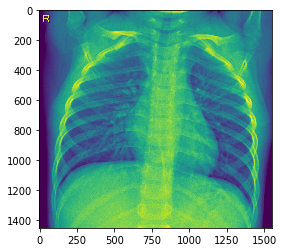

In [10]:
# check images (NO PNEUMONIA)
norm_cell = train_path + 'NORMAL/'+ os.listdir(train_path+'NORMAL')[0]
norm_cell_img = imread(norm_cell)
plt.imshow(norm_cell_img)

In [11]:
# array
norm_cell_img

array([[ 0,  0,  0, ..., 71, 72, 73],
       [ 0,  0,  0, ..., 77, 77, 76],
       [ 0,  0,  0, ..., 77, 76, 73],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [12]:
# returns 2 values if images are B&W and 3 values if rgb...
imread(norm_cell).shape

(1452, 1550)

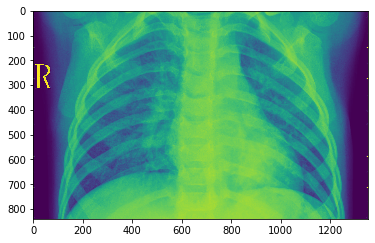

In [13]:
# check images (PNEUMONIA)
pneumonia_cell = train_path + 'PNEUMONIA/'+ os.listdir(train_path+'PNEUMONIA')[0]
pneumonia_cell_img = imread(pneumonia_cell)
plt.imshow(pneumonia_cell_img)

In [14]:
# check image shape
pneumonia_cell_img.shape

(840, 1352)

In [15]:
# example 
# norm_cell = './dataset/pneumonia/C33P1thinF_IMG_20150619_120804a_cell_224.png'
# norm_cell_img = imread(norm_cell)
# plt.imshow(norm_cell_img)

In [16]:
norm_cell_img.shape

(1452, 1550)

In [17]:
# define average image size 
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []

In [18]:
for image_filename in os.listdir(train_path+'NORMAL'):
    img = imread(train_path+'NORMAL'+'/'+image_filename)
    d1,d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

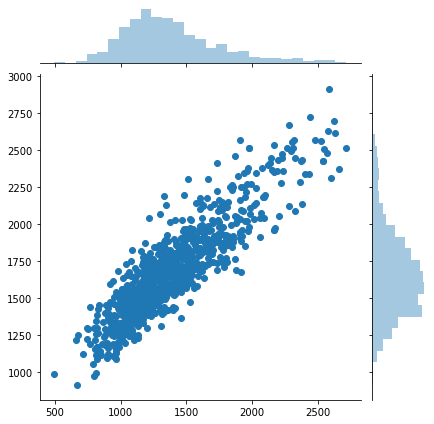

In [19]:
# plotting image size
sns.jointplot(dim1,dim2)

In [20]:
print('mean with: ', np.mean(dim1))
print('mean height: ', np.mean(dim2))

mean with:  1378.9125395152791
mean height:  1673.527924130664


In [21]:
# define image shape
image_shape = (96,96,3)

## Step 2 : preparing the data for the model

### Step 2.1 : check data - folders & folder structures: image manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. 

In [22]:
# reduce datapoints
image_width = 96     # 128
image_height = 96   # 180
# data points to process
print(image_width*image_height, 'data points')

9216 data points


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# help(ImageDataGenerator)

In [24]:
imread(pneumonia_cell).max()

255

In [25]:
imread(pneumonia_cell).min()

0

In [26]:
image_gen = ImageDataGenerator(
    rotation_range=10,        # rotate the image 10 degrees
    width_shift_range=0.10,   # Shift the pic width by a max of 5%
    height_shift_range=0.10,  # Shift the pic height by a max of 5%
    rescale=1/255,            # Rescale the image by normalzing it.
    shear_range=0.1,          # Shear means cutting away part of the image (max 10%)
    zoom_range=0.1,           # Zoom in by 10% max
    horizontal_flip=True,     # Allow horizontal flipping
    fill_mode='nearest'       # Fill in missing pixels with the nearest filled value
)

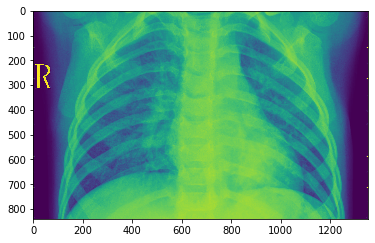

In [27]:
plt.imshow(pneumonia_cell_img)

In [28]:
#image_gen.random_transform(pneumonia_cell_img)

### Step 2.2 :  Generating many manipulated images from a directory


In order to use .flow_from_directory, we must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [29]:
image_gen.flow_from_directory(train_path)

Found 1898 images belonging to 2 classes.


In [30]:
image_gen.flow_from_directory(test_path)

Found 634 images belonging to 2 classes.


## Tensorboard

In [31]:
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime

In [32]:
datetime.now().strftime("%Y-%m-%d--%H%M")

log_directory = 'logs\\2_classes\\pneumonia\\fit'

board = TensorBoard(
    log_dir= log_directory,
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1
)

## Step 3 : Creating the model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [34]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(image_width, image_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), input_shape=(image_width, image_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), input_shape=(image_width, image_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), input_shape=(image_width, image_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), input_shape=(image_width, image_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
# with 3 conv 32,64,64 => Trainable params: 170,958,081
# with 2 conv 32,64    => Trainable params: 695,274,689
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         2

## Step 4: Early stopping (avoid overfitting)

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

## Step 5 : Training the model

In [38]:
# help(image_gen.flow_from_directory)

In [39]:
# set the number of image that are training at the same time (batch)
batch_size = 16

In [40]:
train_image_gen = image_gen.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary'
)

Found 1898 images belonging to 2 classes.


In [41]:
# we could use (image_width, image_height)
image_shape[:2]

(96, 96)

In [42]:
# params documentation : https://keras.io/preprocessing/image/
test_image_gen = image_gen.flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 634 images belonging to 2 classes.


In [43]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [44]:
val_image_gen = image_gen.flow_from_directory(
    val_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    class_mode='binary',
)

Found 634 images belonging to 2 classes.


In [45]:
# the epochs can have a high value, the model is stopped when early stopping is called
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop, board])

Epoch 1/20
119/119 [==============================] - 96s 805ms/step - loss: 0.6954 - accuracy: 0.5126 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/20
119/119 [==============================] - 89s 746ms/step - loss: 0.6318 - accuracy: 0.6444 - val_loss: 0.6116 - val_accuracy: 0.6798
Epoch 3/20
119/119 [==============================] - 92s 775ms/step - loss: 0.4180 - accuracy: 0.8145 - val_loss: 0.3297 - val_accuracy: 0.8628
Epoch 4/20
119/119 [==============================] - 87s 730ms/step - loss: 0.3346 - accuracy: 0.8583 - val_loss: 0.2725 - val_accuracy: 0.8770
Epoch 5/20
119/119 [==============================] - 85s 714ms/step - loss: 0.3088 - accuracy: 0.8699 - val_loss: 0.3439 - val_accuracy: 0.8596
Epoch 6/20
119/119 [==============================] - 83s 693ms/step - loss: 0.2830 - accuracy: 0.8862 - val_loss: 0.2014 - val_accuracy: 0.9274
Epoch 7/20
119/119 [==============================] - 83s 694ms/step - loss: 0.2540 - accuracy: 0.8983 - val_loss: 0.1929 - val_ac

In [46]:
from tensorflow.keras.models import load_model
model.save('pneumonia_detector.h5')

## Step 6 :  Evaluating the Model

In [47]:
losses = pd.DataFrame(model.history.history)

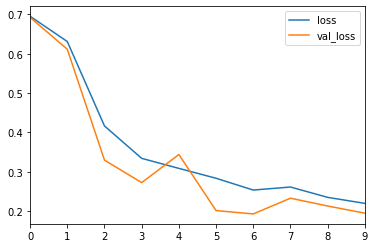

In [48]:
losses[['loss','val_loss']].plot()

In [49]:
accuracies = pd.DataFrame(model.history.history)

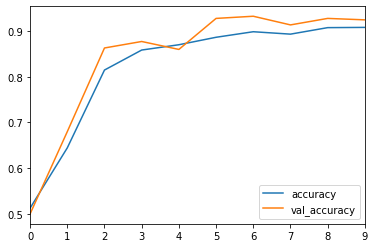

In [50]:
accuracies[['accuracy','val_accuracy']].plot()

In [51]:
model.metrics_names

['loss', 'accuracy']

In [52]:
model.evaluate_generator(test_image_gen)

[0.1873811746481806, 0.9227129]

In [53]:
from tensorflow.keras.preprocessing import image

In [54]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

In [55]:
pred_probabilities

array([[9.49735045e-02],
       [5.43761075e-01],
       [3.35791707e-01],
       [5.66919684e-01],
       [7.99609721e-02],
       [1.82351977e-01],
       [6.72677159e-02],
       [2.29112774e-01],
       [1.14638180e-01],
       [1.38900489e-01],
       [1.17212743e-01],
       [6.38993084e-01],
       [1.76938415e-01],
       [2.46363819e-01],
       [2.17831314e-01],
       [2.11830646e-01],
       [9.85316515e-01],
       [5.92221916e-02],
       [1.12608969e-02],
       [7.70897567e-02],
       [6.49299145e-01],
       [7.94927478e-02],
       [2.07343340e-01],
       [4.35484350e-02],
       [7.44505227e-02],
       [1.19768620e-01],
       [1.82438582e-01],
       [7.07860887e-02],
       [2.83699661e-01],
       [4.30423737e-01],
       [3.94157052e-01],
       [1.67998761e-01],
       [4.30340469e-02],
       [9.72238183e-03],
       [5.16462982e-01],
       [3.11601162e-02],
       [2.34514475e-04],
       [2.22704828e-01],
       [1.57836080e-02],
       [1.02862716e-03],


In [56]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
predictions = pred_probabilities > 0.5

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       317
           1       0.91      0.95      0.93       317

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



In [60]:
print(confusion_matrix(test_image_gen.classes,predictions))

[[287  30]
 [ 16 301]]


## Step 7 :  Predicting Images

In [61]:
val_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [62]:
pred_probabilities = model.predict_generator(val_image_gen)
predictions = pred_probabilities > 0.5
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [63]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49       317
           1       0.49      0.48      0.48       317

    accuracy                           0.49       634
   macro avg       0.49      0.49      0.49       634
weighted avg       0.49      0.49      0.49       634



In [64]:
print(confusion_matrix(val_image_gen.classes,predictions))

[[156 161]
 [164 153]]
